In [20]:
!pip install prophet
!pip install yfinance

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
sp_data = pd.read_csv('SP500_5y.csv', parse_dates=['Date'])

# Ensure 'date' column is in datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'], utc=True)

# Sorting by date 
sp_data.sort_values(by='Date', inplace=True)

# Handling missing values if any
sp_data.dropna(inplace=True)


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

# Define the ticker symbol for S&P 500 (usually represented as ^GSPC)
ticker_symbol = "^GSPC"

# Define the start and end dates for the historical data
start_date = "1927-01-01"
end_date = "2024-02-07"

# Download historical data using yfinance and save it as a DataFrame
sp_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [27]:
# Save sp_data to a CSV file
sp_data.to_csv('SP500_1927.csv')

In [50]:
# Load data from CSV
sp_data = pd.read_csv('SP500_1927.csv', parse_dates=['Date'])

# Ensure 'date' column is in datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# Sorting by date 
sp_data.sort_values(by='Date', inplace=True)

# Handling missing values if any
sp_data.dropna(inplace=True)

In [36]:
sp_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [37]:
# Display DataFrame for context
sp_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30 00:00:00+00:00,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03 00:00:00+00:00,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04 00:00:00+00:00,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05 00:00:00+00:00,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06 00:00:00+00:00,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [38]:
# Extract features and target variable
X = sp_data.index
y = sp_data['Close']

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [41]:
# Make predictions on the testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round both MSE and R2 to 5 decimal places
mse_rounded = round(mse, 5)
r2_rounded = round(r2, 5)

print("Mean Squared Error (MSE):", mse_rounded)
print("R-squared (R2):", r2_rounded)

Mean Squared Error (MSE): 407319.67737
R-squared (R2): 0.58253


In [43]:
import math

# Calculate RMSE
rmse = math.sqrt(mse)

# Round RMSE to 5 decimals
rmse_rounded = round(rmse, 5)

print("Root Mean Squared Error (RMSE):", rmse_rounded)

Root Mean Squared Error (RMSE): 638.21601


In [55]:
sp_data.columns

Index(['ds', 'Open', 'High', 'Low', 'y', 'Adj Close', 'Volume'], dtype='object')

02:23:42 - cmdstanpy - INFO - Chain [1] start processing
02:23:52 - cmdstanpy - INFO - Chain [1] done processing


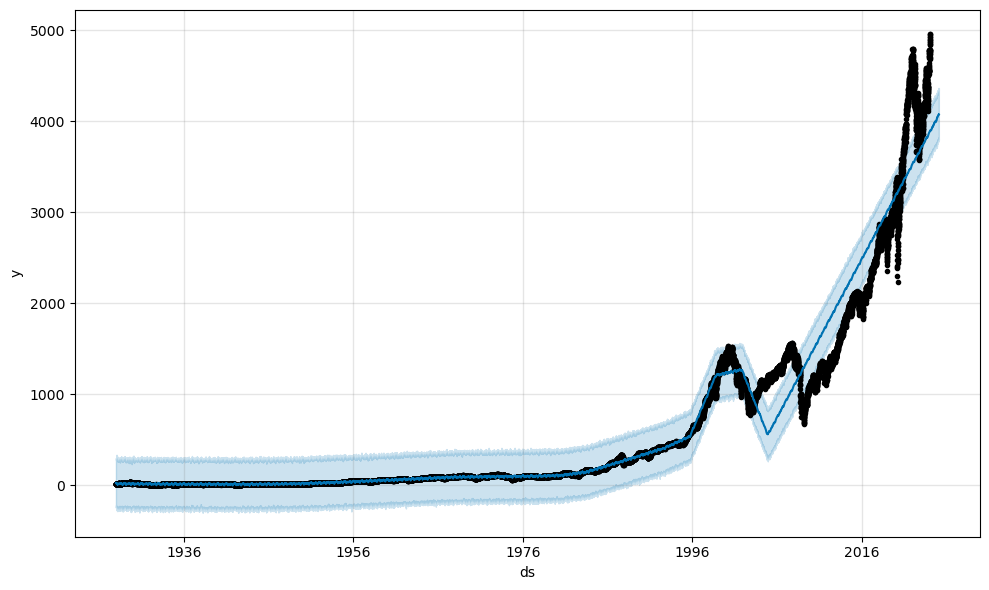

In [57]:
from prophet import Prophet 

# Set timezone to UTC
sp_data['ds'] = sp_data['ds'].dt.tz_localize(None)

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(sp_data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Predict for 365 days into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [61]:
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1927-12-30,17.328903,-242.703478,299.590171,17.328903,17.328903,8.605150,8.605150,8.605150,-0.019310,-0.019310,-0.019310,8.624460,8.624460,8.624460,0.0,0.0,0.0,25.934054
1,1928-01-03,17.322839,-216.854298,290.609572,17.322839,17.322839,9.408729,9.408729,9.408729,0.154572,0.154572,0.154572,9.254158,9.254158,9.254158,0.0,0.0,0.0,26.731569
2,1928-01-04,17.321323,-237.498083,291.427663,17.321323,17.321323,9.577315,9.577315,9.577315,0.216832,0.216832,0.216832,9.360483,9.360483,9.360483,0.0,0.0,0.0,26.898639
3,1928-01-05,17.319807,-240.292420,274.830724,17.319807,17.319807,9.729780,9.729780,9.729780,0.285183,0.285183,0.285183,9.444597,9.444597,9.444597,0.0,0.0,0.0,27.049587
4,1928-01-06,17.318291,-247.506996,292.111662,17.318291,17.318291,9.487159,9.487159,9.487159,-0.019310,-0.019310,-0.019310,9.506469,9.506469,9.506469,0.0,0.0,0.0,26.805450


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
24500,2025-02-01,4065.967096,3811.500733,4355.870525,4062.526584,4065.973612,7.941828,7.941828,7.941828,0.148010,0.148010,0.148010,7.793818,7.793818,7.793818,0.0,0.0,0.0,4073.908924
24501,2025-02-02,4066.443527,3800.582231,4345.292691,4062.961788,4066.499544,7.764902,7.764902,7.764902,0.148009,0.148009,0.148009,7.616893,7.616893,7.616893,0.0,0.0,0.0,4074.208429
24502,2025-02-03,4066.919957,3801.286737,4342.743300,4063.409298,4066.988129,6.476876,6.476876,6.476876,-0.933296,-0.933296,-0.933296,7.410172,7.410172,7.410172,0.0,0.0,0.0,4073.396834
24503,2025-02-04,4067.396388,3809.630147,4332.472903,4063.856808,4067.466151,7.325176,7.325176,7.325176,0.154572,0.154572,0.154572,7.170605,7.170605,7.170605,0.0,0.0,0.0,4074.721564
24504,2025-02-05,4067.872818,3791.097364,4363.882564,4064.304317,4067.949939,7.112367,7.112367,7.112367,0.216832,0.216832,0.216832,6.895535,6.895535,6.895535,0.0,0.0,0.0,4074.985185


In [171]:
# Load spot price of Gold data from CSV
gold_data = pd.read_csv('gold_spot_5y.csv')


In [174]:
# Ensure 'Date' column is in datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)

# If not sorted, sort it first
gold_data.sort_values(by='Date', inplace=True)

In [176]:
sp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0


In [177]:
gold_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-05 05:00:00+00:00,1311.099976,1315.099976,1311.000000,1314.199951,362,0.0,0.0
1,2019-02-06 05:00:00+00:00,1312.500000,1313.500000,1305.000000,1309.500000,358,0.0,0.0
2,2019-02-07 05:00:00+00:00,1302.900024,1310.400024,1302.199951,1309.400024,203,0.0,0.0
3,2019-02-08 05:00:00+00:00,1309.500000,1314.000000,1307.800049,1313.699951,122,0.0,0.0
4,2019-02-11 05:00:00+00:00,1313.400024,1313.400024,1304.699951,1307.000000,119,0.0,0.0


In [178]:
# Convert 'Date' column to datetime with UTC timezone
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)


In [179]:
# Merge sp_data with gold_data using the default index columns
merged_data = pd.merge(sp_data, gold_data, left_index=True, right_index=True, how='inner')


In [180]:
merged_data.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0,2019-02-05 05:00:00+00:00,1311.099976,1315.099976,1311.000000,1314.199951,362,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0,2019-02-06 05:00:00+00:00,1312.500000,1313.500000,1305.000000,1309.500000,358,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0,2019-02-07 05:00:00+00:00,1302.900024,1310.400024,1302.199951,1309.400024,203,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0,2019-02-08 05:00:00+00:00,1309.500000,1314.000000,1307.800049,1313.699951,122,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0,2019-02-11 05:00:00+00:00,1313.400024,1313.400024,1304.699951,1307.000000,119,0.0,0.0


In [181]:
merged_data.columns

Index(['Date_x', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x',
       'Dividends_x', 'Stock Splits_x', 'Date_y', 'Open_y', 'High_y', 'Low_y',
       'Close_y', 'Volume_y', 'Dividends_y', 'Stock Splits_y'],
      dtype='object')

In [184]:
# Install the required libraries
!pip install prophet

01:01:21 - cmdstanpy - INFO - Chain [1] start processing
01:01:21 - cmdstanpy - INFO - Chain [1] done processing


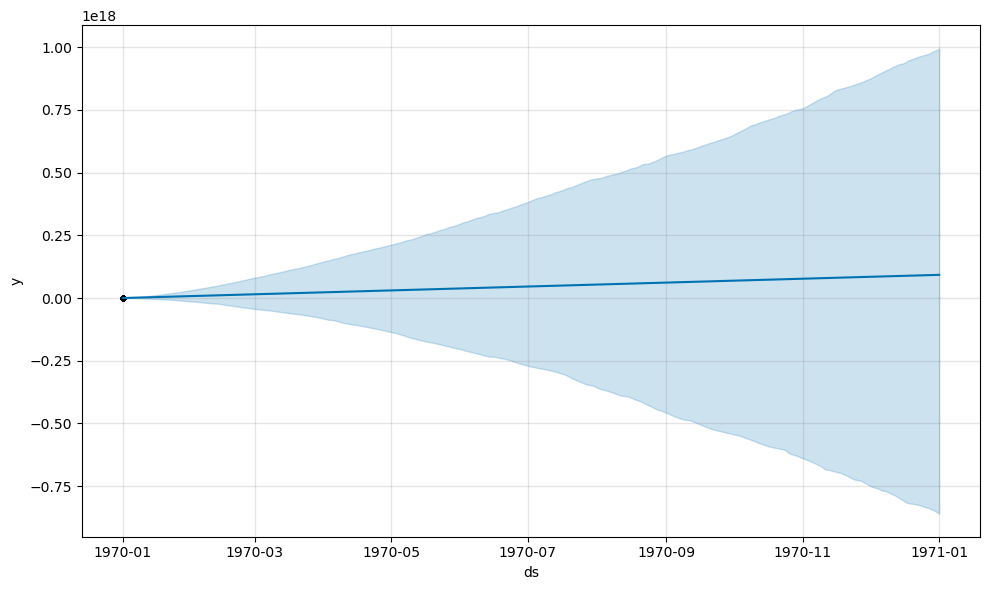

In [190]:
# Prepare DataFrame for Prophet
merged_data_prophet = merged_data[['Date_x', 'Close_x', 'Close_y']].copy()
merged_data_prophet.columns = ['ds', 'sp500', 'gold']  # Renaming columns as per Prophet's requirement

# Use the index as the 'ds' column
merged_data_prophet['ds'] = merged_data_prophet.index

# Ensure 'ds' column is in datetime format
merged_data_prophet['ds'] = pd.to_datetime(merged_data_prophet['ds'])

# Create a new DataFrame for Prophet with 'ds' and 'y' columns
prophet_data = merged_data_prophet[['ds', 'sp500']].copy()
prophet_data.columns = ['ds', 'y']  # Rename 'Close_x' column to 'y'

# Create and fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Making predictions for the next 365 days
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)


01:02:26 - cmdstanpy - INFO - Chain [1] start processing
01:02:26 - cmdstanpy - INFO - Chain [1] done processing


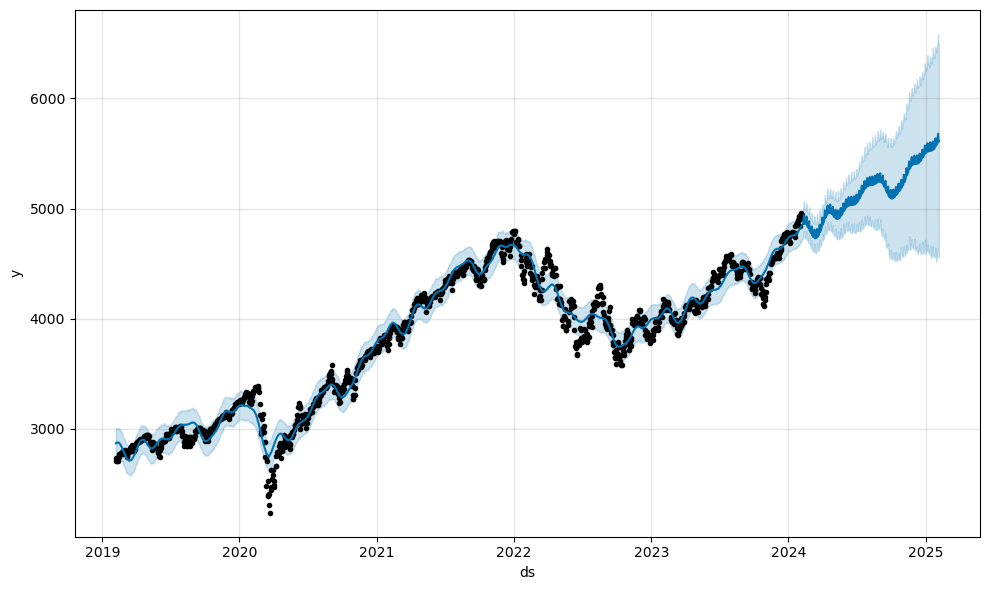

In [191]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Remove timezone information from 'ds' column
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Instantiate Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_data)

# Make future predictions
future_dates = model.make_future_dataframe(periods=365)
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
